# Data Cleaning 
## Methodology 

 CRISP - ML(Q) Method 
 
    1- Business & Data Uncleaning
    2- Data preprocessing
       --- EDA
       --- Data Cleaning
       --- Feature Selection 
    3- Model Selection
    4- Model Evaluation 
    5- Deployment 

## Quality Issue 

1. Missing Values 
2. Duplicate 
3. Outliers 
4. Structural error (Classification)
5. Type Error
  

### Approach
- What is ?
- How it affects ?
- Reason / Mechanism
- Identification?
- Treatment?

## 1. Missing Value 
**Defination**
- The Value which is not aviliable , Blanked Data
- nan,NaN,NaT, null

**Impact**
- To find the insight 
- Patterns you can't find perfect patterns.

**Reason/Mechanism**
1. Missing Completely at Random (MCAR)
  - We can't find the reason for missing value  ie The reason is unknown.
  - System glithces , server Error , Data Base Issue , Internet Issues
2. Missing at Random (MAR)
  - We can know Partially the reason for the missing value 
3. Missing not at Random (MNAR)
  - We know the reason for the misssing value 
  
**Identification**
1. df.isna()
2. df.isnull()

In [1]:
import numpy as np
import pandas as pd 

# Missing Value 

In [4]:
df = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\EDA\Pandas\Datasets\Missing Values\SampleWeatherData.csv")
df

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,NaN,NaN
2,2023-04-03,NaN,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,NaN,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,NaN,NaN
8,2023-04-09,NaN,75.0
9,2023-04-10,30.0,NaN


## Identification

In [7]:
df.isna().sum()

Time           0
Temperature    5
Humidity       5
dtype: int64

In [8]:
df.isnull().sum()

Time           0
Temperature    5
Humidity       5
dtype: int64

In [13]:
import missingno  # For visualizing missing data 

In [12]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

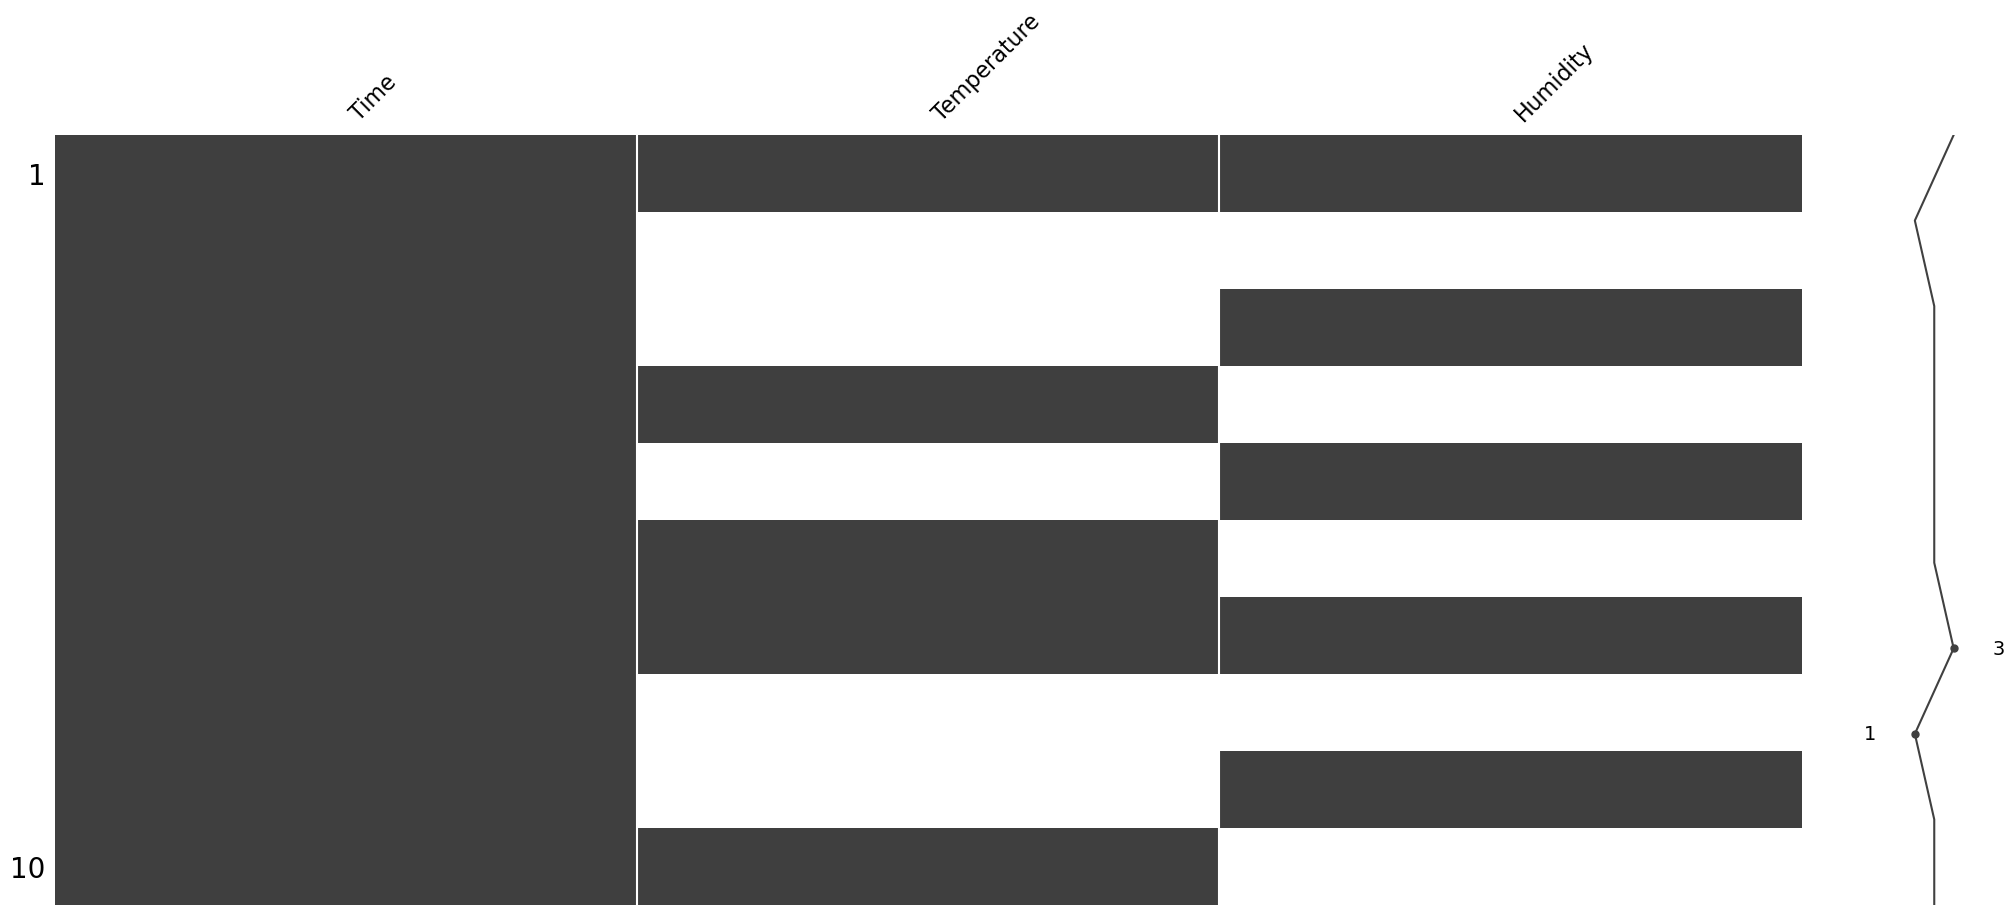

In [14]:
missingno.matrix(df)

<AxesSubplot:>

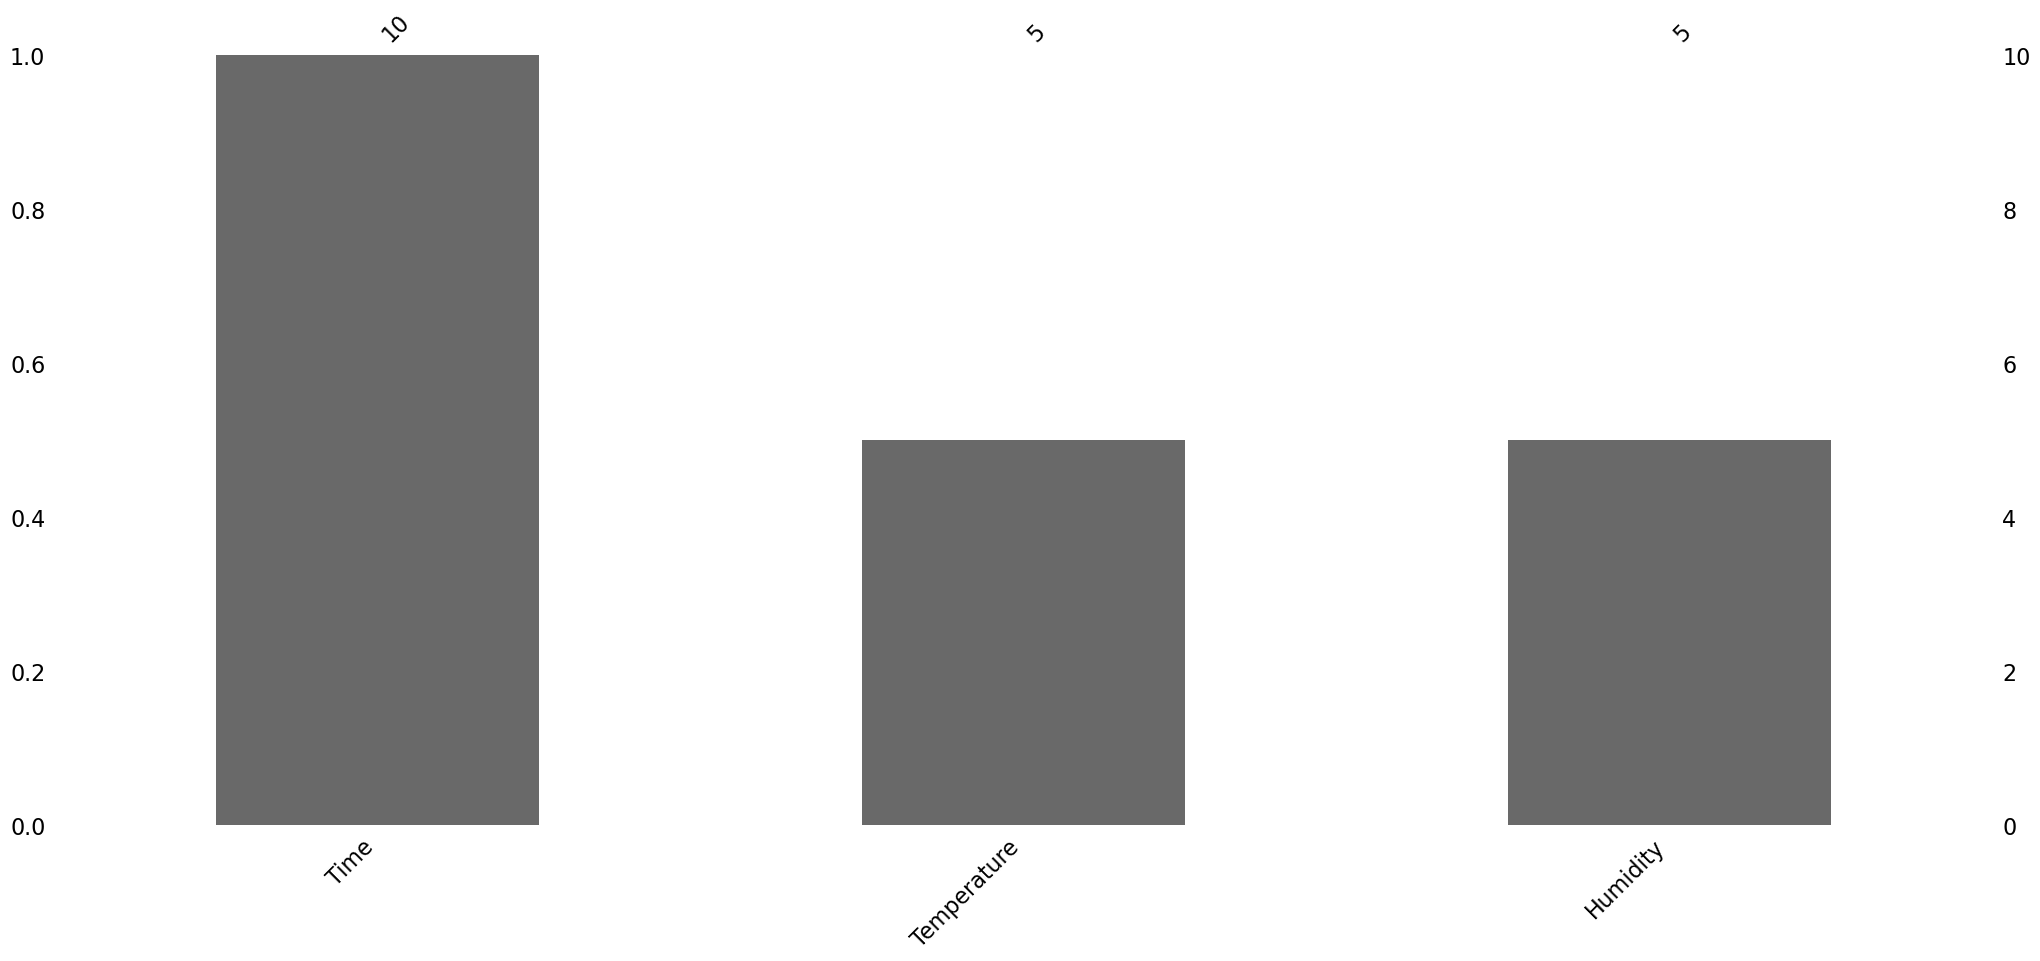

In [15]:
missingno.bar(df)

<AxesSubplot:>

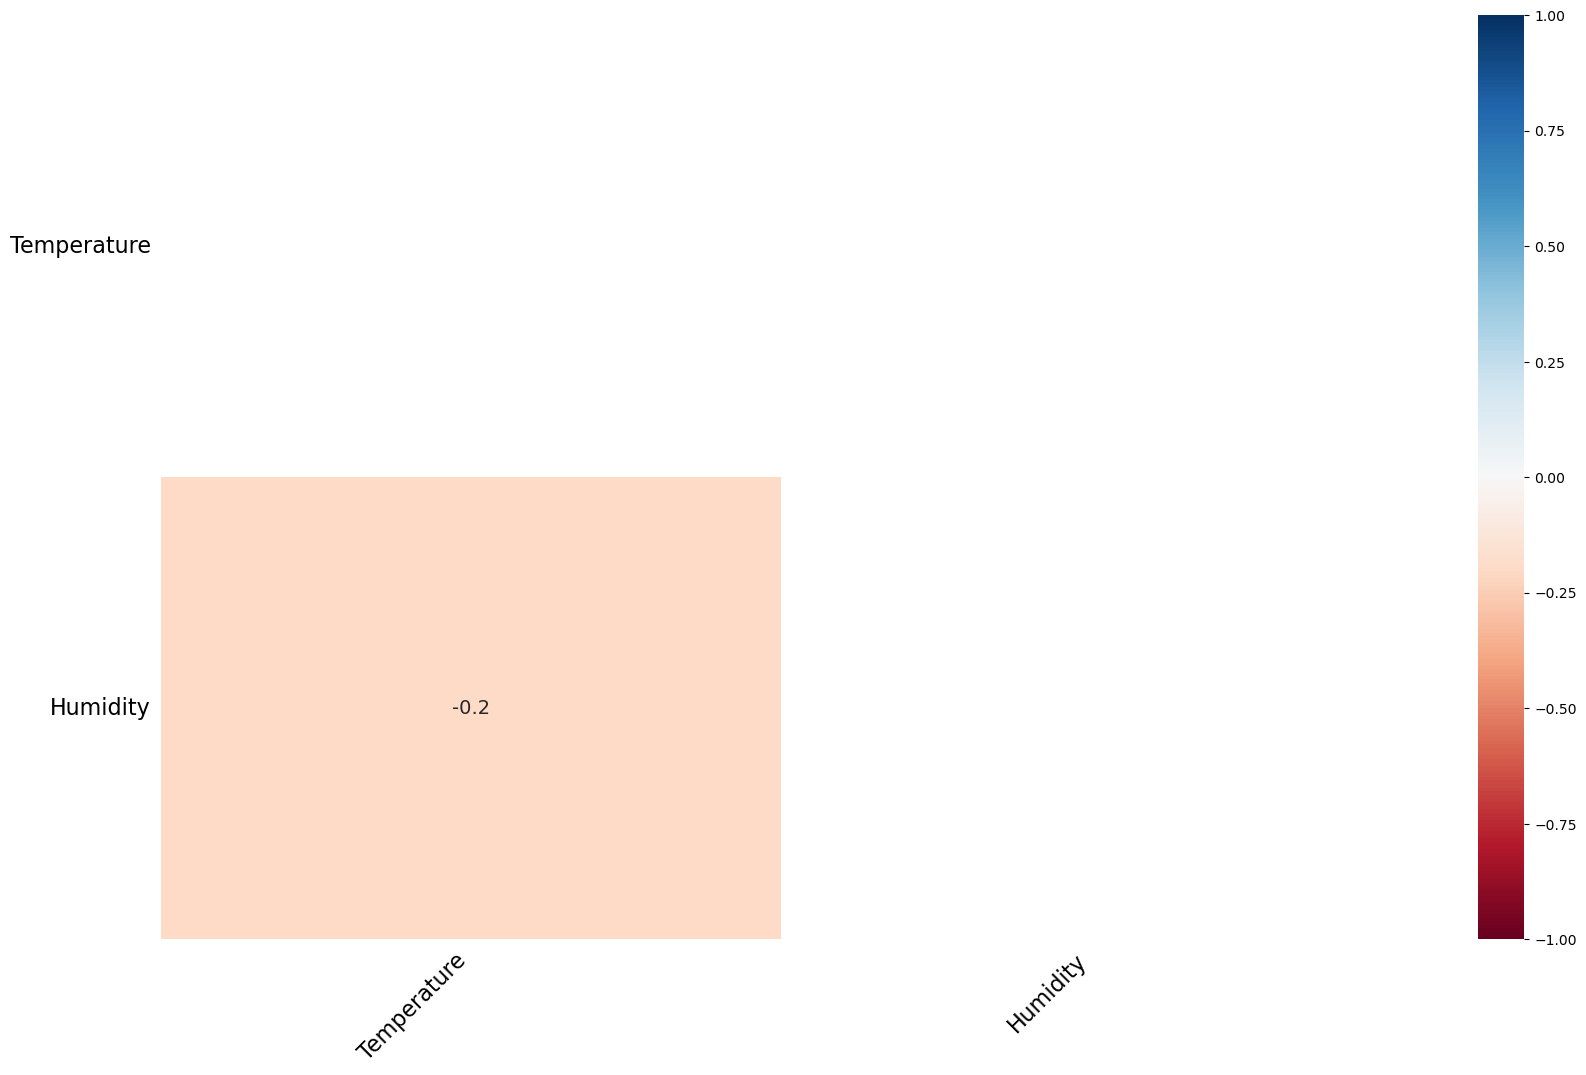

In [16]:
missingno.heatmap(df)

<AxesSubplot:>

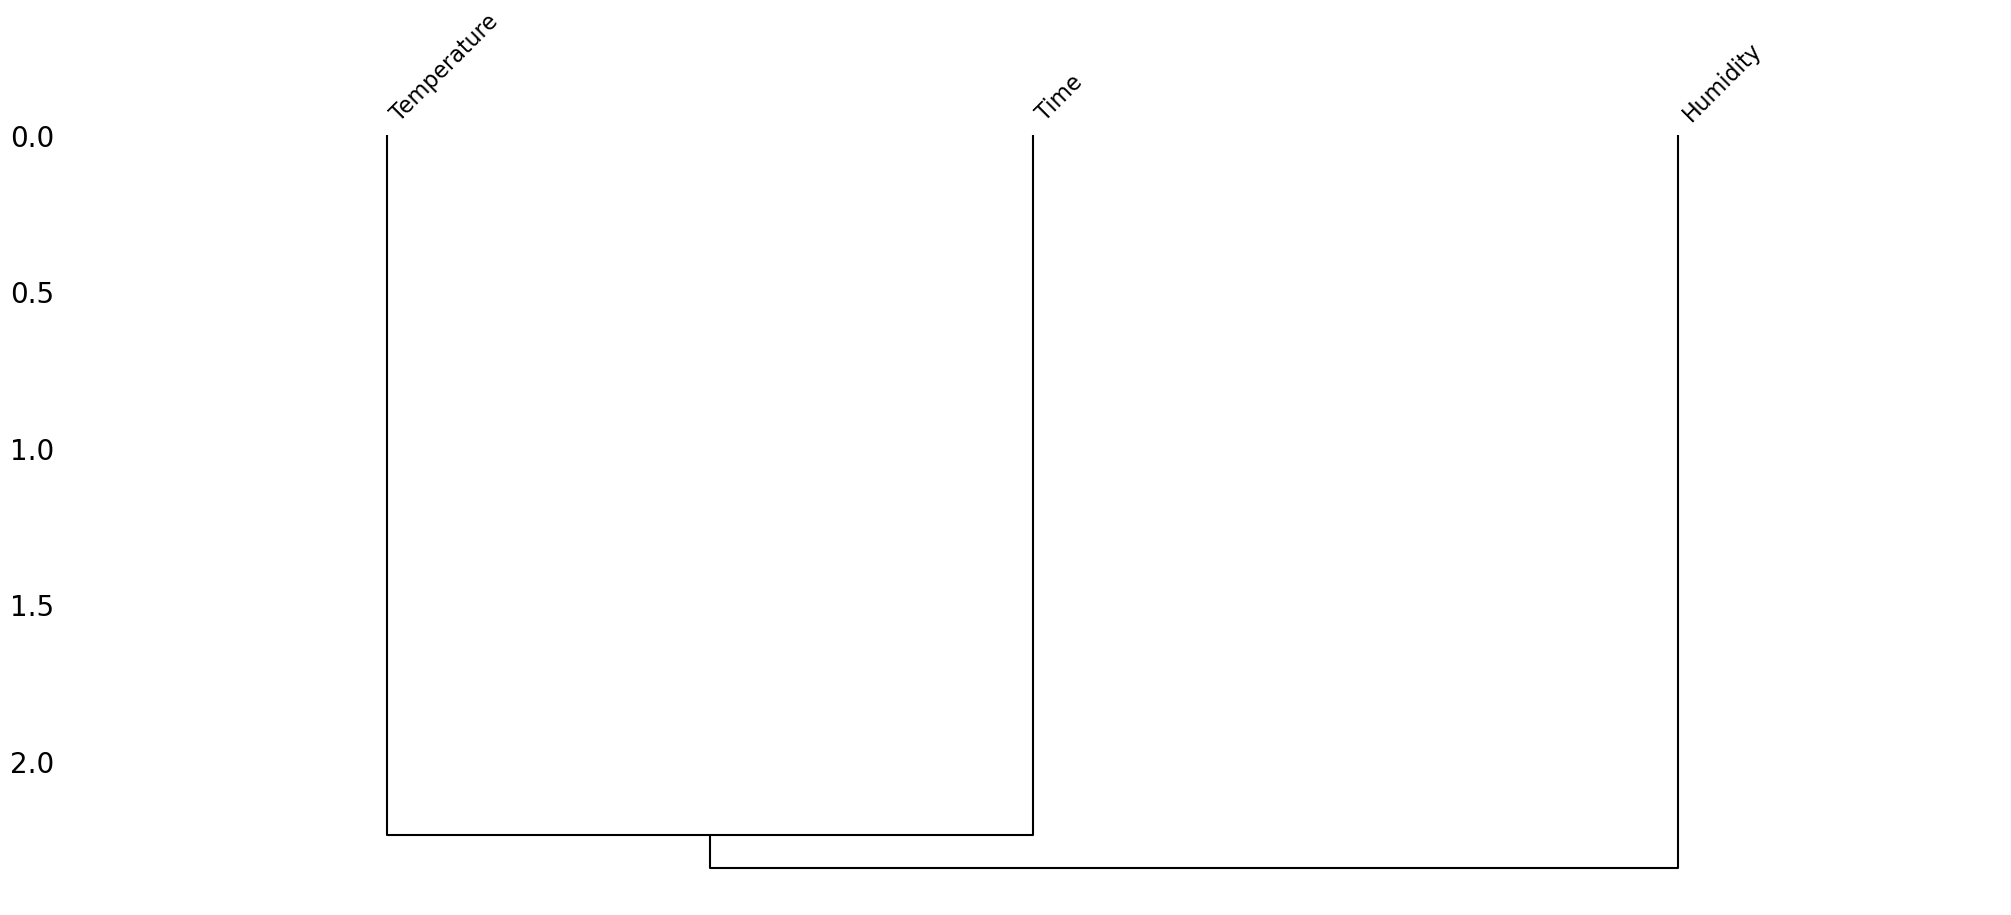

In [18]:
missingno.dendrogram(df)

## Treatment 
1. Drop 
2. Fill

In [20]:
df

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,NaN,NaN
2,2023-04-03,NaN,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,NaN,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,NaN,NaN
8,2023-04-09,NaN,75.0
9,2023-04-10,30.0,NaN


### 1 Drop

In [21]:
df.dropna()

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
6,2023-04-07,29.0,70.0


In [22]:
df.dropna(axis=1)

,Time
0,2023-04-01
1,2023-04-02
2,2023-04-03
3,2023-04-04
4,2023-04-05
5,2023-04-06
6,2023-04-07
7,2023-04-08
8,2023-04-09
9,2023-04-10


### 2 Filling the missing value 
 - Statistical Method(Mean,Median,Mode) 
 
 - Filling Dataset value 
   - bfill--Backward value
   - ffill--Forward Value
   
 - Constant
   - Domain Knowledge  
 
 - Interpolate
   - Linear Polynomial
 
 - groupby

In [24]:
df

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,NaN,NaN
2,2023-04-03,NaN,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,NaN,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,NaN,NaN
8,2023-04-09,NaN,75.0
9,2023-04-10,30.0,NaN


### Filling The Data Set with Statistical Method 

In [25]:
df['Temperature'].mean()

26.8

In [26]:
df['Temperature'].fillna(df['Temperature'].mean())

0    22.0
1    26.8
2    26.8
3    25.0
4    26.8
5    28.0
6    29.0
7    26.8
8    26.8
9    30.0
Name: Temperature, dtype: float64

In [27]:
df

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,NaN,NaN
2,2023-04-03,NaN,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,NaN,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,NaN,NaN
8,2023-04-09,NaN,75.0
9,2023-04-10,30.0,NaN


In [28]:
 df['Temperature'].fillna(df['Temperature'].mean(),inplace=True)  # For View Version 

In [29]:
df

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,26.8,NaN
2,2023-04-03,26.8,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,26.8,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,26.8,NaN
8,2023-04-09,26.8,75.0
9,2023-04-10,30.0,NaN


In [30]:
df['Humidity'].median()

65.0

In [31]:
df['Humidity'].fillna(df['Humidity'].median())

0    55.0
1    65.0
2    60.0
3    65.0
4    65.0
5    65.0
6    70.0
7    65.0
8    75.0
9    65.0
Name: Humidity, dtype: float64

In [32]:
df['Humidity'].fillna(df['Humidity'].median(),inplace = True)
df

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,26.8,65.0
2,2023-04-03,26.8,60.0
3,2023-04-04,25.0,65.0
4,2023-04-05,26.8,65.0
5,2023-04-06,28.0,65.0
6,2023-04-07,29.0,70.0
7,2023-04-08,26.8,65.0
8,2023-04-09,26.8,75.0
9,2023-04-10,30.0,65.0


In [34]:
df.isna().sum()

Time           0
Temperature    0
Humidity       0
dtype: int64

In [35]:
# Now For some Categorical Data 

In [41]:
Data = pd.DataFrame({'Gender':['Male','Male','Female',np.nan,"Male", np.nan]})
Data

,Gender
0,Male
1,Male
2,Female
3,NaN
4,Male
5,NaN


In [42]:
Data['Gender'].fillna(Data['Gender'].mode())

0      Male
1      Male
2    Female
3       NaN
4      Male
5       NaN
Name: Gender, dtype: object

In [43]:
Data['Gender'].fillna(Data['Gender'].mode()[0])  # Mode - Most repeated value (Change)

0      Male
1      Male
2    Female
3      Male
4      Male
5      Male
Name: Gender, dtype: object

In [44]:
Data['Gender'].fillna(Data['Gender'].mode()[0],inplace = True )

In [45]:
Data

,Gender
0,Male
1,Male
2,Female
3,Male
4,Male
5,Male


### Filling The Data Set Values

In [48]:
df1 = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\EDA\Pandas\Datasets\Missing Values\SampleWeatherData.csv")
df1

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,NaN,NaN
2,2023-04-03,NaN,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,NaN,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,NaN,NaN
8,2023-04-09,NaN,75.0
9,2023-04-10,30.0,NaN


In [51]:
df1.fillna(method='bfill')

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,25.0,60.0
2,2023-04-03,25.0,60.0
3,2023-04-04,25.0,65.0
4,2023-04-05,28.0,65.0
5,2023-04-06,28.0,70.0
6,2023-04-07,29.0,70.0
7,2023-04-08,30.0,75.0
8,2023-04-09,30.0,75.0
9,2023-04-10,30.0,NaN


In [52]:
df1

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,NaN,NaN
2,2023-04-03,NaN,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,NaN,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,NaN,NaN
8,2023-04-09,NaN,75.0
9,2023-04-10,30.0,NaN


In [53]:
df1.fillna(method='ffill')

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,22.0,55.0
2,2023-04-03,22.0,60.0
3,2023-04-04,25.0,60.0
4,2023-04-05,25.0,65.0
5,2023-04-06,28.0,65.0
6,2023-04-07,29.0,70.0
7,2023-04-08,29.0,70.0
8,2023-04-09,29.0,75.0
9,2023-04-10,30.0,75.0


In [54]:
df1


,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,NaN,NaN
2,2023-04-03,NaN,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,NaN,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,NaN,NaN
8,2023-04-09,NaN,75.0
9,2023-04-10,30.0,NaN


In [55]:
df1.fillna(method='pad')  # Both Backward and Fordward randomly 

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,22.0,55.0
2,2023-04-03,22.0,60.0
3,2023-04-04,25.0,60.0
4,2023-04-05,25.0,65.0
5,2023-04-06,28.0,65.0
6,2023-04-07,29.0,70.0
7,2023-04-08,29.0,70.0
8,2023-04-09,29.0,75.0
9,2023-04-10,30.0,75.0


### Filling with Constant(Domain Knowledge)

In [56]:
df

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,26.8,65.0
2,2023-04-03,26.8,60.0
3,2023-04-04,25.0,65.0
4,2023-04-05,26.8,65.0
5,2023-04-06,28.0,65.0
6,2023-04-07,29.0,70.0
7,2023-04-08,26.8,65.0
8,2023-04-09,26.8,75.0
9,2023-04-10,30.0,65.0


In [60]:
df1['Temperature'].fillna(27.4,inplace = True )

In [61]:
df1['Humidity'].fillna(75,inplace = True )

In [62]:
df1

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,27.4,75.0
2,2023-04-03,27.4,60.0
3,2023-04-04,25.0,75.0
4,2023-04-05,27.4,65.0
5,2023-04-06,28.0,75.0
6,2023-04-07,29.0,70.0
7,2023-04-08,27.4,75.0
8,2023-04-09,27.4,75.0
9,2023-04-10,30.0,75.0


### Filling with Interpolation

In [63]:
df2 = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\EDA\Pandas\Datasets\Missing Values\SampleWeatherData.csv")
df2

,Time,Temperature,Humidity
0,2023-04-01,22.0,55.0
1,2023-04-02,NaN,NaN
2,2023-04-03,NaN,60.0
3,2023-04-04,25.0,NaN
4,2023-04-05,NaN,65.0
5,2023-04-06,28.0,NaN
6,2023-04-07,29.0,70.0
7,2023-04-08,NaN,NaN
8,2023-04-09,NaN,75.0
9,2023-04-10,30.0,NaN


In [66]:
df2.interpolate(method = 'linear')   # It is used when Relation between data is linear # Other wise Research more in interpolate 

,Time,Temperature,Humidity
0,2023-04-01,22.000000,55.0
1,2023-04-02,23.000000,57.5
2,2023-04-03,24.000000,60.0
3,2023-04-04,25.000000,62.5
4,2023-04-05,26.500000,65.0
5,2023-04-06,28.000000,67.5
6,2023-04-07,29.000000,70.0
7,2023-04-08,29.333333,72.5
8,2023-04-09,29.666667,75.0
9,2023-04-10,30.000000,75.0


In [68]:
df2.interpolate(method = 'polynomial',order = 3)   # Order Depend on Column 

,Time,Temperature,Humidity
0,2023-04-01,22.000000,55.0
1,2023-04-02,22.417094,57.5
2,2023-04-03,23.512821,60.0
3,2023-04-04,25.000000,62.5
4,2023-04-05,26.591453,65.0
5,2023-04-06,28.000000,67.5
6,2023-04-07,29.000000,70.0
7,2023-04-08,29.611966,72.5
8,2023-04-09,29.917949,75.0
9,2023-04-10,30.000000,NaN


### Filling with group by   (IMP)
 -- When the Data Know why it missing 

In [69]:
df = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\EDA\Pandas\Datasets\Missing Values\marks_missing.csv")
df

,Grade,Marks
0,A,NaN
1,A,77.0
2,B,65.0
3,B,NaN
4,C,45.0
5,C,37.0
6,A,88.0
7,B,NaN
8,C,40.0
9,A,95.0


In [71]:
df['Marks'].fillna(df['Marks'].mean(),inplace = True )  ## Grade A and B grade same not suitable 
df

,Grade,Marks
0,A,63.857143
1,A,77.000000
2,B,65.000000
3,B,63.857143
4,C,45.000000
5,C,37.000000
6,A,88.000000
7,B,63.857143
8,C,40.000000
9,A,95.000000


In [78]:
df = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\EDA\Pandas\Datasets\Missing Values\marks_missing.csv")
df

,Grade,Marks
0,A,NaN
1,A,77.0
2,B,65.0
3,B,NaN
4,C,45.0
5,C,37.0
6,A,88.0
7,B,NaN
8,C,40.0
9,A,95.0


In [79]:
df['Marks'] = np.round(df.groupby(by = 'Grade')['Marks'].transform(lambda x:x.fillna(x.mean())),2)
df

,Grade,Marks
0,A,86.67
1,A,77.00
2,B,65.00
3,B,65.00
4,C,45.00
5,C,37.00
6,A,88.00
7,B,65.00
8,C,40.00
9,A,95.00
